In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
df = pd.read_csv('Iris.csv')

# Drop the ID column
df = df.drop(['Id'], axis=1)

# Encode target labels (Species)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

# Separate features and target
X = df.drop('Species', axis=1)
y = df['Species']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Normalized Features:\n", X_scaled[:5])


Normalized Features:
 [[-0.14836085  0.39022456 -0.47264838 -0.51128062]
 [-0.48502584 -0.80890299 -0.47264838 -0.51128062]
 [-0.82169083 -0.32925197 -0.56437948 -0.51128062]
 [-0.99002333 -0.56907748 -0.38091728 -0.51128062]
 [-0.31669334  0.63005007 -0.47264838 -0.51128062]]


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

print("Predictions:", y_pred)


Predictions: [0 0 0 0 0 1 0 0 0 0 0 0]


K=1 -> Accuracy: 1.00
K=2 -> Accuracy: 0.92
K=3 -> Accuracy: 0.92
K=4 -> Accuracy: 0.92
K=5 -> Accuracy: 0.92
K=6 -> Accuracy: 0.92
K=7 -> Accuracy: 0.92
K=8 -> Accuracy: 0.92
K=9 -> Accuracy: 0.92
K=10 -> Accuracy: 0.92


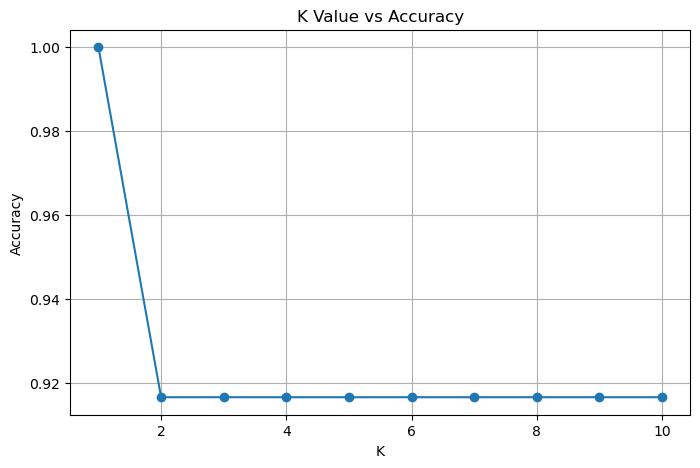

In [4]:
from sklearn.metrics import accuracy_score

k_values = range(1, 11)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)
    print(f"K={k} -> Accuracy: {acc:.2f}")

# Optional: Plot K vs Accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('K Value vs Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


In [5]:
from sklearn.metrics import confusion_matrix, classification_report

# Train with best K (Example: k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9166666666666666
Confusion Matrix:
 [[10  0]
 [ 1  1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.50      0.67         2

    accuracy                           0.92        12
   macro avg       0.95      0.75      0.81        12
weighted avg       0.92      0.92      0.90        12



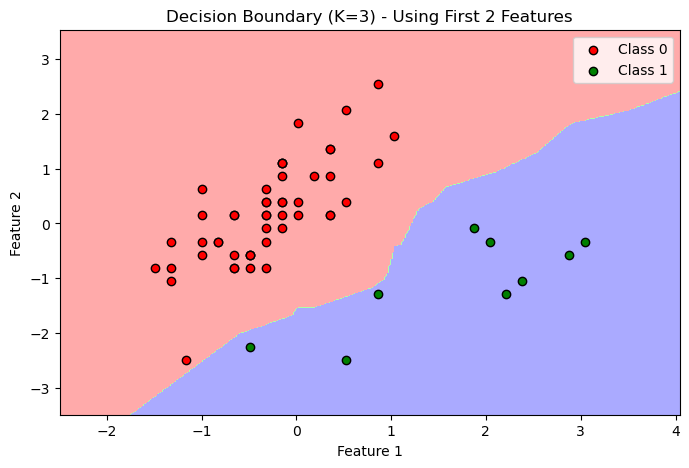

In [6]:
import numpy as np
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, k):
    X_plot = X[:, :2]  # Use first two features for 2D visualization
    h = .02  # Step size

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_plot, y)

    x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
    y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ['red', 'green', 'blue']

    plt.figure(figsize=(8, 5))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    for idx, label in enumerate(np.unique(y)):
        plt.scatter(X_plot[y == label, 0], X_plot[y == label, 1],
                    c=cmap_bold[idx], label=f'Class {label}', edgecolor='k')
    plt.title(f'Decision Boundary (K={k}) - Using First 2 Features')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Call the function
plot_decision_boundary(X_scaled, y, k=3)
